In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [5]:
# Load the dataset
data = pd.read_csv("ToyotaCorolla.csv")
print(data.head())

# Check the shape of the data
print(data.shape)

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [6]:
# Data Preprocessing
print(data.dtypes)
print(data.isna().sum()) # Check for null values

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [12]:
# Columns to keep
columns_to_keep = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]

# Keep only the specified columns
df= data[columns_to_keep]

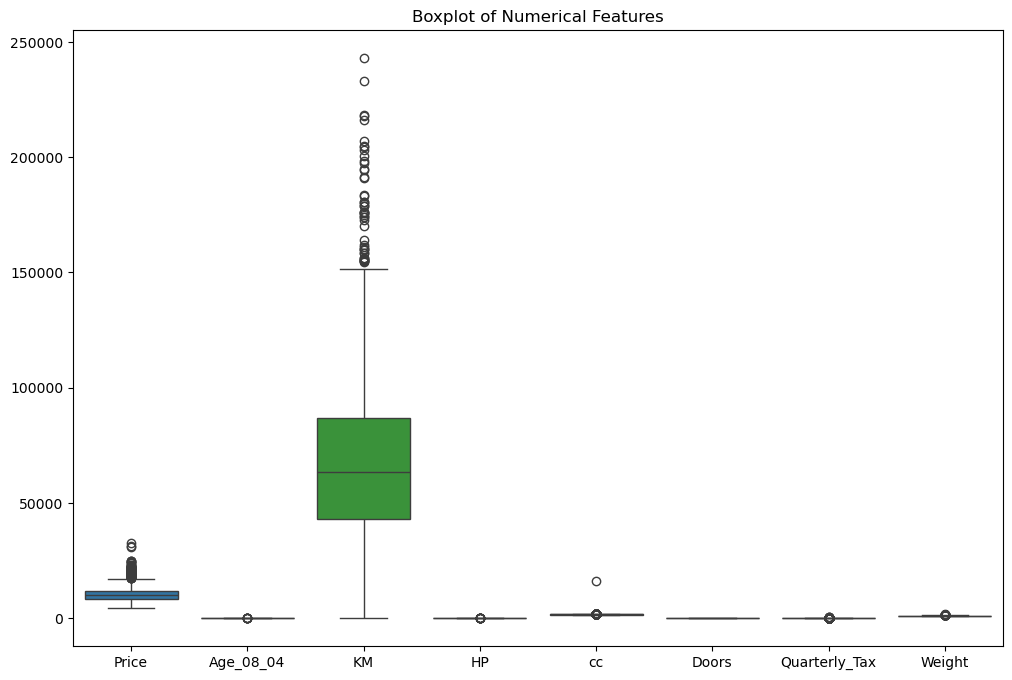

In [13]:
# Check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Quarterly_Tax", "Weight"]])
plt.title("Boxplot of Numerical Features")
plt.show()

(<Axes: >, (1436, 9))

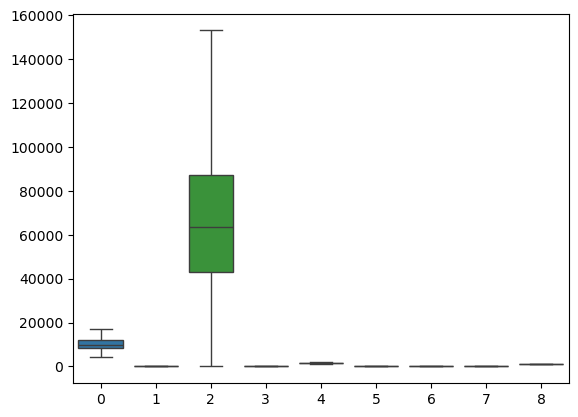

In [14]:
#Now outlier Treatment using replacement technique

IQR=df.quantile(0.75)-df.quantile(0.25)
IQR
lower_limit=df.quantile(0.25)-1.5*IQR
upper_limit=df.quantile(0.75)+1.5*IQR
IQR,lower_limit,upper_limit

df_replaced=pd.DataFrame(np.where(df>upper_limit,upper_limit,np.where(df<lower_limit,lower_limit,df)))
sns.boxplot(df_replaced),df_replaced.shape
#now from boxplot we can see that outliers has been removed

In [15]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [16]:
data=df

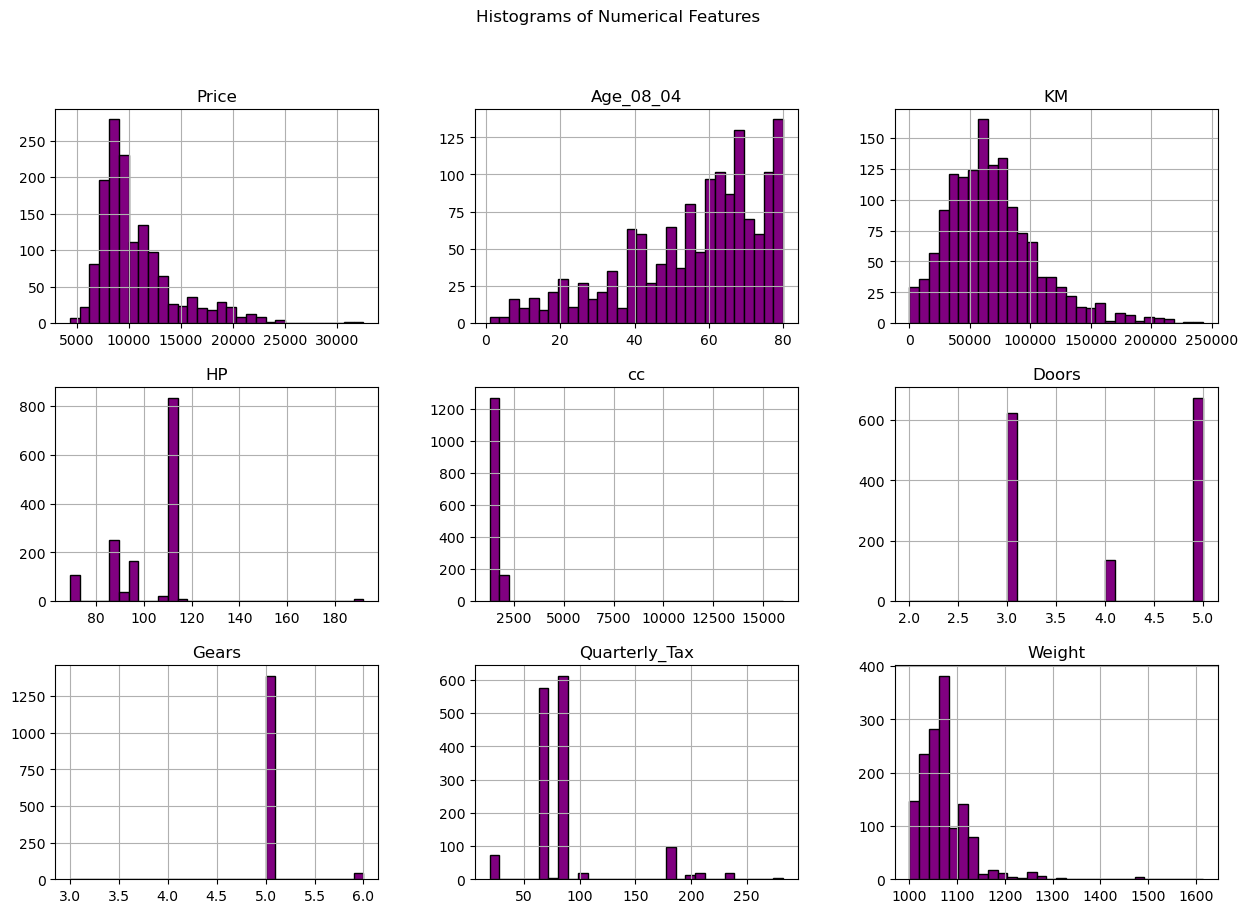

In [17]:
# Univariate Analysis
data.hist(figsize=(15, 10), bins=30, color='purple', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

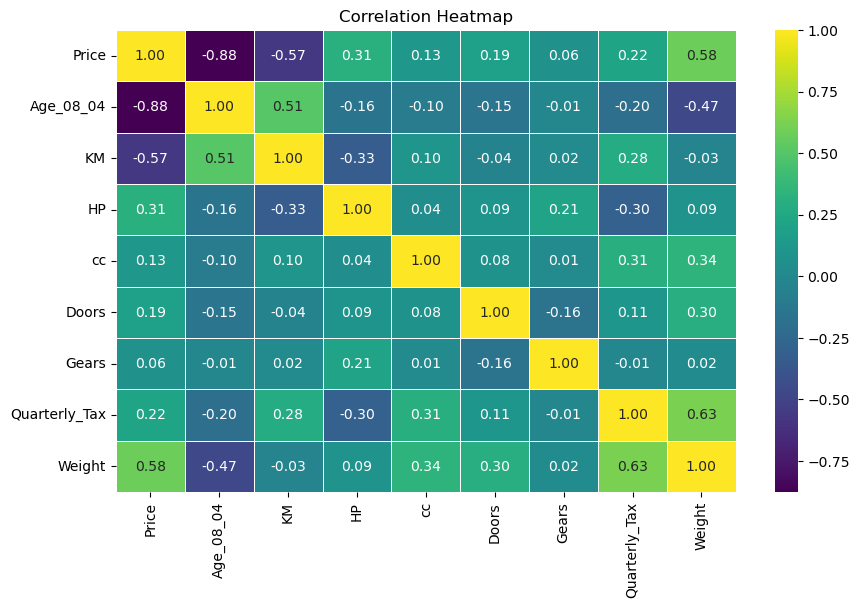

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# Define Features (X) and Target (y)
X = df.drop(columns=["Price"])  # Independent variables
y = df["Price"]  # Dependent variable

In [38]:
# Split data into Train & Test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Build Multilinear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [41]:
# Predictions
y_pred = model.predict(X_test)


In [42]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

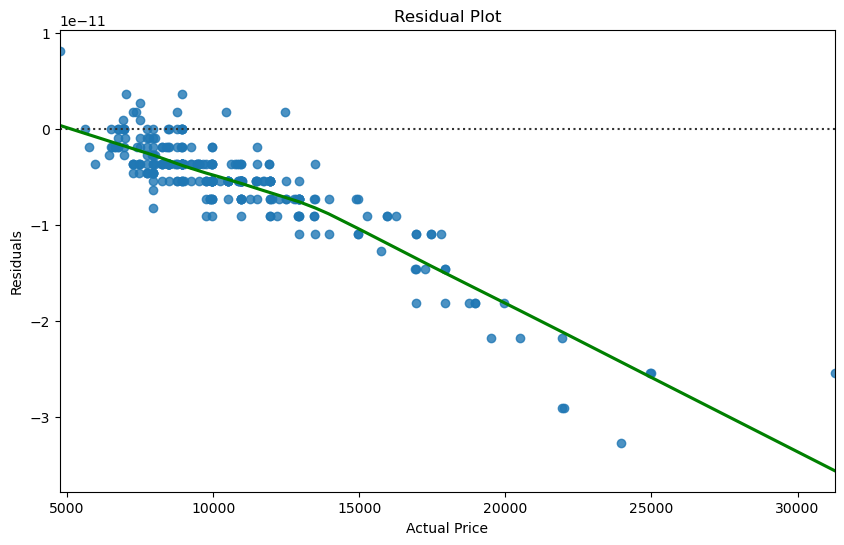

In [32]:
# Diagnostic Plots
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={"color": "green"})
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [44]:
# Display Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 995.59
Mean Squared Error (MSE): 1950244.99
Root Mean Squared Error (RMSE): 1396.51
R-Squared (R²): 0.85


In [45]:
# Model Tuning (Regularization)
# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))


In [46]:
# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_lasso_pred = lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))

# Compare Models
print("\nModel Comparison:")
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")


Model Comparison:
Linear Regression RMSE: 1396.51
Ridge Regression RMSE: 1396.56
Lasso Regression RMSE: 1396.52


         Feature  Coefficient  Absolute Coefficient
5          Gears   566.402069            566.402069
0      Age_08_04  -119.692339            119.692339
2             HP    28.521533             28.521533
7         Weight    19.363926             19.363926
4          Doors     5.573234              5.573234
6  Quarterly_Tax     1.427170              1.427170
3             cc    -0.108497              0.108497
1             KM    -0.020761              0.020761


C:\Users\viren\AppData\Local\Temp\ipykernel_2416\2239774464.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Absolute Coefficient", y="Feature", data=coefficients, palette="viridis")


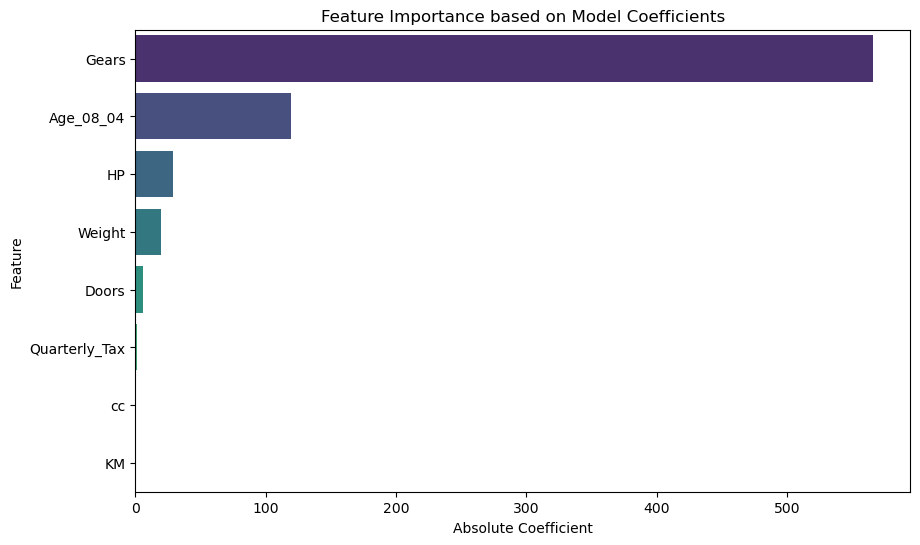

In [49]:
# Checking model coefficients and feature importance
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients["Absolute Coefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="Absolute Coefficient", ascending=False)
print(coefficients)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Absolute Coefficient", y="Feature", data=coefficients, palette="viridis")
plt.title("Feature Importance based on Model Coefficients")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.show()